## Import das bibliotecas utilizadas


In [1]:
import pandas as pd
import numpy as np
import openpyxl

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import multimode


### Carregamento dos dados para a parte de Modelagem

In [2]:
df_transposed_copy_inputting_v19 = pd.read_csv(r'Projeto/Data/Output/df_transposed_copy_inputting_v19.csv')


## Modelagem

In [22]:
df_model = df_transposed_copy_inputting_v19.copy()

In [24]:
df_model['year'] = pd.to_datetime(df_model['year'], format='ISO8601')


In [25]:
df_model.set_index('year', inplace = True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 1980-01-01 to 2028-01-01
Columns: 228 entries, Afghanistan to World
dtypes: float64(228)
memory usage: 87.7 KB


In [26]:
df_model.head(5)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,4.345486,2.7,-5.4,2.877381,2.4,8.2,0.7,5.290000,5.399885,2.9,...,-0.8,3.3,3.988678,1.8,6.4,0.9,-1.9,3.8,3.991920,2.1
1981-01-01,7.200000,5.7,3.0,0.385714,-4.4,3.8,-5.7,3.798462,-3.624698,4.1,...,-0.5,1.9,1.792949,0.1,0.9,2.0,-0.2,4.2,4.567689,1.9
1982-01-01,5.116667,2.9,6.4,0.371429,0.0,-0.1,-3.1,2.306923,4.538833,0.1,...,1.4,1.5,5.395555,0.6,-0.5,-0.1,0.4,2.2,8.037341,0.7
1983-01-01,4.283333,1.1,5.4,1.471429,4.2,5.4,3.7,0.815385,1.930603,-0.5,...,4.6,1.8,4.752000,1.7,-2.8,3.3,0.7,4.0,3.300508,2.6
1984-01-01,6.166667,2.0,5.6,2.585714,6.0,10.2,2.0,-0.676154,-15.680825,6.3,...,4.1,4.1,-0.599934,2.5,3.9,5.0,0.3,6.6,5.023940,4.6


In [27]:
test_years = 5
train_data = df_model[:-test_years]
test_data = df_model[-test_years:]

### Modelo ARIMA

### Modelo AutoARIMA

In [38]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Escolher o país para modelagem (substitua 'Afghanistan' pelo nome do país desejado)
pais = 'Argentina'
country_data = df_model[pais]

# Calcular as taxas de crescimento
growth_rates = country_data.pct_change().dropna()

# Dividir os dados em conjuntos de treinamento e teste
train_ratio = 0.8
total_samples = len(growth_rates)
train_samples = int(total_samples * train_ratio)
train_data = growth_rates.iloc[:train_samples]

# Encontrar os melhores hiperparâmetros usando o AutoARIMA
model_sarimax = auto_arima(
    train_data,
    m=12,
    seasonal=False,
    stepwise=False
)

/home/hingryd/Documents/Lighthouse/DS/venv/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [39]:
# Resto do processo de modelagem e avaliação

# Fazer previsões no conjunto de teste
test_data = growth_rates.iloc[train_samples:]
forecast_steps = len(test_data)
forecast, conf_int = model_sarimax.predict(n_periods=forecast_steps, return_conf_int=True)

# Calcular métricas de avaliação
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data, forecast)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 2.3711847258337007
MSE: 14.348041641033012
RMSE: 3.7878808905551677
MAPE: inf%


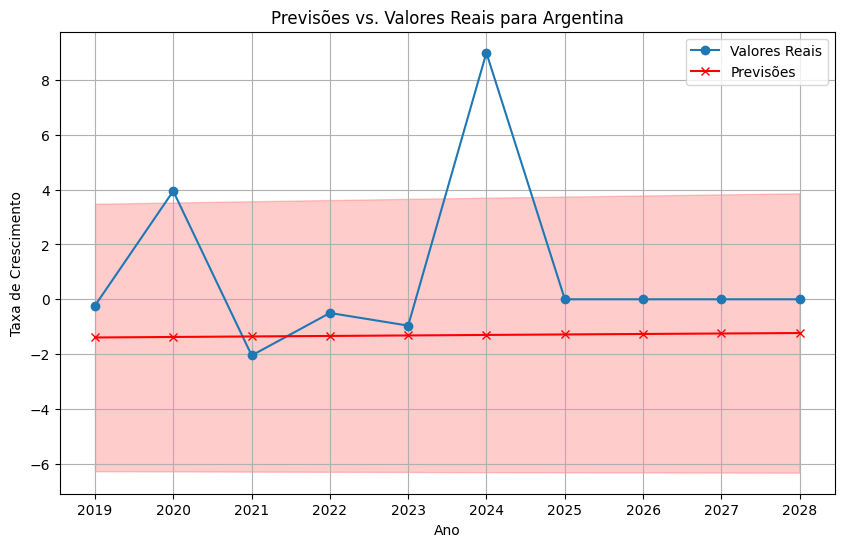

In [40]:
import matplotlib.pyplot as plt

# Plotar os dados originais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Valores Reais', marker='o')
plt.plot(test_data.index, forecast, label='Previsões', color='red', marker='x')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2)
plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento')
plt.title(f'Previsões vs. Valores Reais para {pais}')
plt.legend()
plt.grid(True)
plt.show()
